In [ ]:
# Overfitting
# what is causing overfitting?
# Obs(samples) -> model(knobs) X: 1,2,3,4,5. y 2,4,6,8,10. 
# what is a good model?
# 2 conditions. 1. model should be flex (have enough knobs) 2. model must rigid (can't have too many knobs) regularization. restrict the knobs in 
# movements



# SVM
# 1. transfer the data points to infinite dimention, hyper plane to seperate. 2. select the best plane.   
# Random forest

# Random forest
#ensemble, weak learners, comparing a big strong learner.  

# obs -> model
# model -> predict

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")


# Make some data points, feel free to make your own

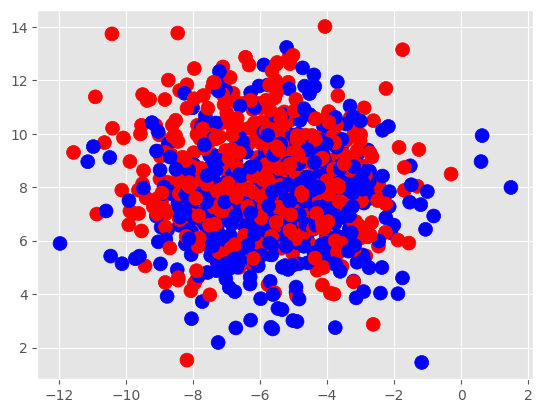

In [10]:
# Demonstrate that support vectors will sometimes cross the margin
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=5, cluster_std=1.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

# test all kinds of models

## 1. SVM. linear kernel vs rbf for simple data sets

In [11]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Fit to the training data and validate with the test data
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1])

In [13]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.62      0.62      0.62       128
         red       0.60      0.60      0.60       122

    accuracy                           0.61       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.61      0.61      0.61       250



## svm with rbf kernel

In [14]:
# Fit to the training data and validate with the test data
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0])

In [15]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.61      0.70      0.65       128
         red       0.62      0.53      0.58       122

    accuracy                           0.62       250
   macro avg       0.62      0.61      0.61       250
weighted avg       0.62      0.62      0.61       250



## For simple data, linear kernel is pretty much the same as RBF kernel. 
## however linear kernel has the advantage of being simple, less likely to overfit 


# Linear kernel vs RBF kernel for non linear data

Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.39      0.42       100
           1       0.46      0.53      0.50       100

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200

RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       100
           1       0.96      0.93      0.94       100

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



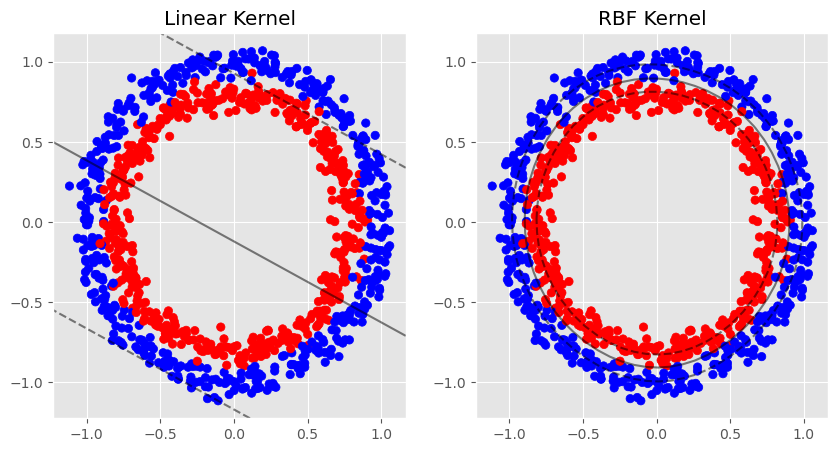

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Create a dataset of circles
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SVM with a linear kernel
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
linear_predictions = linear_svc.predict(X_test)
print("Linear Kernel Classification Report:")
print(classification_report(y_test, linear_predictions))

# Use SVM with a RBF kernel
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
rbf_predictions = rbf_svc.predict(X_test)
print("RBF Kernel Classification Report:")
print(classification_report(y_test, rbf_predictions))

# Plot the data
plt.figure(figsize=(10,5))

# Plot data with linear SVM decision boundary
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = linear_svc.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Linear Kernel')

# Plot data with RBF SVM decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rbf_svc.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('RBF Kernel')

plt.show()


## RBF is better in this case